In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder,MinMaxScaler

In [ ]:
#loading the datset
train=pd.read_csv('train_genetic_disorders.csv')
test=pd.read_csv('test_genetic_disorders.csv')
data_train=train.copy()
data_test=test.copy()

In [ ]:
train

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6.0,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2.0,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10.0,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99.0,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5.0,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0.0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13.0,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99.0,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5.0,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99.0,Multiple,6.195178,normal,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train.dtypes

Patient Id                                           object
Patient Age                                         float64
Genes in mother's side                               object
Inherited from father                                object
Maternal gene                                        object
Paternal gene                                        object
Blood cell count (mcL)                              float64
Patient First Name                                   object
Family Name                                          object
Father's name                                        object
Mother's age                                        float64
Father's age                                        float64
Institute Name                                       object
Location of Institute                                object
Status                                               object
Respiratory Rate (breaths/min)                       object
Heart Rate (rates/min                   

In [ ]:
#No. of missing values in each row
data_train.isnull().sum()

Patient Id                                           1072
Patient Age                                          2440
Genes in mother's side                               1072
Inherited from father                                1359
Maternal gene                                        3766
Paternal gene                                        1072
Blood cell count (mcL)                               1072
Patient First Name                                   1072
Family Name                                         10312
Father's name                                        1072
Mother's age                                         6790
Father's age                                         6761
Institute Name                                       5932
Location of Institute                                1072
Status                                               1072
Respiratory Rate (breaths/min)                       3131
Heart Rate (rates/min                                3097
Test 1        

In [ ]:
data_test.isnull().sum()

Patient Id                                           173
Patient Age                                          173
Genes in mother's side                               173
Inherited from father                                717
Maternal gene                                       3829
Paternal gene                                        173
Blood cell count (mcL)                               173
Patient First Name                                   173
Family Name                                         9316
Father's name                                        173
Mother's age                                         173
Father's age                                         173
Institute Name                                      2170
Location of Institute                                173
Status                                               173
Respiratory Rate (breaths/min)                      3013
Heart Rate (rates/min                               3014
Test 1                         

In [ ]:
#subset where no all rows being null
data_fea_train=data_train[data_train.isnull().all(1)!=True]
#subset where no all rows being null
data_fea_train=data_train[data_train.isnull().all(1)!=True]

In [ ]:
#subset where no all rows being null
data_fea_test=data_test[data_test.isnull().all(1)!=True]

In [ ]:
data_test

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6.0,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2.0,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10.0,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99.0,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5.0,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0.0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13.0,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99.0,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5.0,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99.0,Multiple,6.195178,normal,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(data_fea_train.shape,data_fea_test.shape)

(21011, 45) (9290, 43)


In [ ]:
data_fea_test.isnull().sum()

Patient Id                                             0
Patient Age                                            0
Genes in mother's side                                 0
Inherited from father                                544
Maternal gene                                       3656
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9143
Father's name                                          0
Mother's age                                           0
Father's age                                           0
Institute Name                                      1997
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2840
Heart Rate (rates/min                               2841
Test 1                         

In [ ]:
# Dropping the features
data_fea_train=data_fea_train.drop(columns=['Patient Id','Patient First Name','Family Name','Father\'s name','Institute Name','Location of Institute','Test 1','Test 2','Test 3','Test 4',
'Test 5','Parental consent'])
data_fea_test=data_fea_test.drop(columns=['Patient Id','Patient First Name','Family Name','Father\'s name','Institute Name','Location of Institute','Test 1','Test 2','Test 3','Test 4',
'Test 5','Parental consent'])

In [ ]:
print(data_fea_train.shape,data_fea_test.shape)

(21011, 33) (9290, 31)


In [ ]:
# renaming the columns
data_fea_train=data_fea_train.rename(columns={"Genes in mother's side":'defective_mother',
                    'Inherited from father':'defective_father',
                    'Maternal gene':'maternal_gene','Paternal gene':'paternal_gene',
                    'Respiratory Rate (breaths/min)':'respiratory_rate','Heart Rate (rates/min':'heart_rate',
                    'Parental consent':'parental_consent','Follow-up':'follow_up','Birth asphyxia':'birth_asphyxia',
                    'Autopsy shows birth defect (if applicable)':'birth_defect_autopsy','Place of birth':'birth_place',
                    'Folic acid details (peri-conceptional)':'folic_acid_periconceptional',
                    'H/O serious maternal illness':'maternal_illness','H/O radiation exposure (x-ray)':'radiation_exposure',
                    'H/O substance abuse':'substance_abuse','Assisted conception IVF/ART':'assisted_conception',
                    'History of anomalies in previous pregnancies':'previous_pregnancy_anomalies',
                    'Birth defects':'birth_defects','Blood test result':'blood_test_result','Genetic Disorder':'genetic_disorder',
                    'Disorder Subclass':'disorder_subclass','Patient Age':'patient_age','Blood cell count (mcL)':'blood_cell_count',
                    "Mother's age":'mother_age',"Father's age":'father_age','No. of previous abortion':'num_previous_abortion',
                    'White Blood cell count (thousand per microliter)':'WBC_count'})

In [ ]:
data_fea_test=data_fea_test.rename(columns={"Genes in mother's side":'defective_mother',
                    'Inherited from father':'defective_father',
                    'Maternal gene':'maternal_gene','Paternal gene':'paternal_gene',
                    'Respiratory Rate (breaths/min)':'respiratory_rate','Heart Rate (rates/min':'heart_rate',
                    'Parental consent':'parental_consent','Follow-up':'follow_up','Birth asphyxia':'birth_asphyxia',
                    'Autopsy shows birth defect (if applicable)':'birth_defect_autopsy','Place of birth':'birth_place',
                    'Folic acid details (peri-conceptional)':'folic_acid_periconceptional',
                    'H/O serious maternal illness':'maternal_illness','H/O radiation exposure (x-ray)':'radiation_exposure',
                    'H/O substance abuse':'substance_abuse','Assisted conception IVF/ART':'assisted_conception',
                    'History of anomalies in previous pregnancies':'previous_pregnancy_anomalies',
                    'Birth defects':'birth_defects','Blood test result':'blood_test_result','Genetic Disorder':'genetic_disorder',
                    'Disorder Subclass':'disorder_subclass','Patient Age':'patient_age','Blood cell count (mcL)':'blood_cell_count',
                    "Mother's age":'mother_age',"Father's age":'father_age','No. of previous abortion':'num_previous_abortion',
                    'White Blood cell count (thousand per microliter)':'WBC_count'})

In [ ]:
data_fea_train['genetic_disorder']

0         Mitochondrial genetic inheritance disorders
1                                                 NaN
2        Multifactorial genetic inheritance disorders
3         Mitochondrial genetic inheritance disorders
4        Multifactorial genetic inheritance disorders
                             ...                     
21006                Single-gene inheritance diseases
21007     Mitochondrial genetic inheritance disorders
21008    Multifactorial genetic inheritance disorders
21009     Mitochondrial genetic inheritance disorders
21010     Mitochondrial genetic inheritance disorders
Name: genetic_disorder, Length: 21011, dtype: object

In [ ]:
# missing target variables
data_fea_train.iloc[:,-2].isnull().sum(),data_fea_train.iloc[:,-1].isnull().sum()

(2049, 2068)

In [ ]:
# removing rows of missing target variables
data_fea_train=data_fea_train[(data_fea_train['genetic_disorder'].isnull()!=True)&(data_fea_train['disorder_subclass'].isnull()!=True)]

In [ ]:
data_fea_train.shape

(17160, 33)

In [ ]:
data_fea_train

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,genetic_disorder,disorder_subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21005,2.0,Yes,No,NaN,No,5.144151,19.0,42.0,Alive,Tachypnea,...,Singular,9.863374,slightly abnormal,1.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
21006,11.0,No,Yes,Yes,No,5.090495,46.0,NaN,Alive,NaN,...,Multiple,NaN,normal,1.0,NaN,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
21007,NaN,No,No,No,Yes,5.214750,NaN,38.0,Alive,Tachypnea,...,Singular,7.086312,slightly abnormal,1.0,NaN,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
21009,1.0,Yes,No,No,Yes,5.224828,33.0,24.0,Deceased,Tachypnea,...,Multiple,12.000000,inconclusive,0.0,1.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy


In [ ]:
#Subsetting
X=data_fea_train.iloc[:,:-2]
y1=data_fea_train.iloc[:,-2]
y2=data_fea_train.iloc[:,-1]

In [ ]:
X

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21005,2.0,Yes,No,NaN,No,5.144151,19.0,42.0,Alive,Tachypnea,...,No,4.0,Singular,9.863374,slightly abnormal,1.0,0.0,1.0,0.0,0.0
21006,11.0,No,Yes,Yes,No,5.090495,46.0,NaN,Alive,NaN,...,Yes,NaN,Multiple,NaN,normal,1.0,NaN,0.0,0.0,0.0
21007,NaN,No,No,No,Yes,5.214750,NaN,38.0,Alive,Tachypnea,...,NaN,3.0,Singular,7.086312,slightly abnormal,1.0,NaN,1.0,0.0,1.0
21009,1.0,Yes,No,No,Yes,5.224828,33.0,24.0,Deceased,Tachypnea,...,Yes,1.0,Multiple,12.000000,inconclusive,0.0,1.0,1.0,1.0,0.0


In [ ]:
X.dtypes

patient_age                     float64
defective_mother                 object
defective_father                 object
maternal_gene                    object
paternal_gene                    object
blood_cell_count                float64
mother_age                      float64
father_age                      float64
Status                           object
respiratory_rate                 object
heart_rate                       object
follow_up                        object
Gender                           object
birth_asphyxia                   object
birth_defect_autopsy             object
birth_place                      object
folic_acid_periconceptional      object
maternal_illness                 object
radiation_exposure               object
substance_abuse                  object
assisted_conception              object
previous_pregnancy_anomalies     object
num_previous_abortion           float64
birth_defects                    object
WBC_count                       float64


In [ ]:
y1

0         Mitochondrial genetic inheritance disorders
2        Multifactorial genetic inheritance disorders
3         Mitochondrial genetic inheritance disorders
4        Multifactorial genetic inheritance disorders
5                    Single-gene inheritance diseases
                             ...                     
21005     Mitochondrial genetic inheritance disorders
21006                Single-gene inheritance diseases
21007     Mitochondrial genetic inheritance disorders
21009     Mitochondrial genetic inheritance disorders
21010     Mitochondrial genetic inheritance disorders
Name: genetic_disorder, Length: 17160, dtype: object

In [ ]:
y2

0        Leber's hereditary optic neuropathy
2                                   Diabetes
3                             Leigh syndrome
4                                     Cancer
5                            Cystic fibrosis
                        ...                 
21005                 Mitochondrial myopathy
21006                              Tay-Sachs
21007                         Leigh syndrome
21009                 Mitochondrial myopathy
21010                         Leigh syndrome
Name: disorder_subclass, Length: 17160, dtype: object

In [ ]:
# shape of features,target variables
X.shape,y1.shape,y2.shape

((17160, 31), (17160,), (17160,))

In [ ]:
# test data
X_test=data_fea_test

In [ ]:
#converting dissimilar datatype to one
for i in X_test.columns:
    if X_test[i].dtype!=X[i].dtype:
        X_test[i]=X_test[i].astype(X[i].dtype.name)

In [ ]:
X_test.dtypes

patient_age                     float64
defective_mother                 object
defective_father                 object
maternal_gene                    object
paternal_gene                    object
blood_cell_count                float64
mother_age                      float64
father_age                      float64
Status                           object
respiratory_rate                 object
heart_rate                       object
follow_up                        object
Gender                           object
birth_asphyxia                   object
birth_defect_autopsy             object
birth_place                      object
folic_acid_periconceptional      object
maternal_illness                 object
radiation_exposure               object
substance_abuse                  object
assisted_conception              object
previous_pregnancy_anomalies     object
num_previous_abortion           float64
birth_defects                    object
WBC_count                       float64


In [ ]:
X.dtypes

patient_age                     float64
defective_mother                 object
defective_father                 object
maternal_gene                    object
paternal_gene                    object
blood_cell_count                float64
mother_age                      float64
father_age                      float64
Status                           object
respiratory_rate                 object
heart_rate                       object
follow_up                        object
Gender                           object
birth_asphyxia                   object
birth_defect_autopsy             object
birth_place                      object
folic_acid_periconceptional      object
maternal_illness                 object
radiation_exposure               object
substance_abuse                  object
assisted_conception              object
previous_pregnancy_anomalies     object
num_previous_abortion           float64
birth_defects                    object
WBC_count                       float64


In [ ]:
X_test

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,6.0,No,Yes,No,No,4.981655,38.0,61.0,Alive,Tachypnea,...,-99,2.0,Multiple,-99.000000,slightly abnormal,1.0,1.0,1.0,1.0,1.0
1,10.0,Yes,No,NaN,Yes,5.118890,33.0,53.0,Alive,NaN,...,Yes,-99.0,Multiple,8.179584,normal,0.0,0.0,0.0,1.0,0.0
2,5.0,No,NaN,No,No,4.876204,48.0,60.0,Deceased,NaN,...,No,0.0,Singular,-99.000000,slightly abnormal,0.0,0.0,1.0,1.0,0.0
3,13.0,No,Yes,Yes,No,4.687767,25.0,55.0,Alive,-99,...,Yes,-99.0,Singular,6.884071,normal,1.0,0.0,1.0,0.0,1.0
4,5.0,No,NaN,NaN,Yes,5.152362,41.0,38.0,Deceased,Tachypnea,...,No,-99.0,Multiple,6.195178,normal,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9285,6.0,Yes,Yes,No,Yes,5.327978,42.0,44.0,Deceased,-99,...,-99,4.0,Singular,4.111201,normal,1.0,1.0,1.0,1.0,1.0
9286,5.0,Yes,No,NaN,Yes,4.754449,45.0,27.0,Deceased,NaN,...,-99,1.0,Singular,-99.000000,inconclusive,1.0,1.0,1.0,1.0,0.0
9287,5.0,Yes,Yes,No,Yes,4.824619,26.0,27.0,Alive,Tachypnea,...,No,2.0,Singular,8.291072,-99,1.0,1.0,1.0,1.0,1.0
9288,7.0,Yes,No,Yes,No,5.050829,43.0,62.0,Deceased,NaN,...,-99,0.0,-99,5.180411,slightly abnormal,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Data Cleaning
X_test=X_test.replace('-99',np.nan)
# Cleaning_data
# replace '-' with other values
X['radiation_exposure']=X['radiation_exposure'].replace('-','others')
X['substance_abuse']=X['substance_abuse'].replace('-','others')
# Cleaning_data
X_test['radiation_exposure']=X_test['radiation_exposure'].replace('-','others')
X_test['substance_abuse']=X_test['substance_abuse'].replace('-','others')


In [ ]:
# Data Cleaning
X_test['WBC_count']=X_test['WBC_count'].mask(X_test['WBC_count']<0,np.nan)
X_test['num_previous_abortion']=X_test['num_previous_abortion'].mask(X_test['num_previous_abortion']<0,np.nan)

In [ ]:
#Splitting the data
X_train1,X_val1,y_train1,y_val1= train_test_split(X,y1,stratify=y1,test_size=0.20)
X_train2,X_val2,y_train2,y_val2= train_test_split(X,y2,stratify=y2,test_size=0.20)

In [ ]:
y_val1

2675                Single-gene inheritance diseases
18348    Mitochondrial genetic inheritance disorders
5301     Mitochondrial genetic inheritance disorders
6190     Mitochondrial genetic inheritance disorders
17446    Mitochondrial genetic inheritance disorders
                            ...                     
5260     Mitochondrial genetic inheritance disorders
6667                Single-gene inheritance diseases
3988     Mitochondrial genetic inheritance disorders
19326               Single-gene inheritance diseases
5407     Mitochondrial genetic inheritance disorders
Name: genetic_disorder, Length: 3432, dtype: object

In [ ]:
# shape of train,validation set
print(X_train1.shape,X_val1.shape,y_train1.shape,y_val1.shape)
print(X_train2.shape,X_val2.shape,y_train2.shape,y_val2.shape)

(13728, 31) (3432, 31) (13728,) (3432,)
(13728, 31) (3432, 31) (13728,) (3432,)


In [ ]:
X_train2

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
17355,12.0,Yes,Yes,Yes,No,4.629415,40.0,42.0,Alive,NaN,...,No,3.0,Singular,8.339747,NaN,1.0,0.0,0.0,0.0,NaN
15406,6.0,Yes,Yes,Yes,No,5.073749,37.0,54.0,Deceased,Tachypnea,...,Yes,4.0,Singular,3.036009,abnormal,1.0,1.0,0.0,1.0,1.0
18146,1.0,Yes,Yes,Yes,Yes,4.674242,29.0,25.0,Deceased,Normal (30-60),...,Yes,0.0,Singular,3.856325,inconclusive,0.0,1.0,0.0,1.0,1.0
17240,5.0,Yes,No,No,Yes,4.855161,26.0,63.0,Alive,Normal (30-60),...,Yes,0.0,Multiple,7.498965,inconclusive,0.0,0.0,1.0,1.0,1.0
6424,9.0,No,Yes,NaN,Yes,5.077073,44.0,48.0,Alive,NaN,...,No,NaN,Multiple,9.456945,abnormal,1.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13116,9.0,Yes,No,No,No,4.827091,18.0,41.0,Deceased,Normal (30-60),...,Yes,3.0,Multiple,10.387110,inconclusive,1.0,0.0,1.0,0.0,0.0
6547,6.0,Yes,Yes,No,Yes,5.092245,NaN,NaN,Alive,Tachypnea,...,Yes,3.0,Multiple,10.297350,abnormal,1.0,0.0,NaN,0.0,0.0
4518,2.0,Yes,No,Yes,Yes,4.751224,48.0,48.0,Alive,Normal (30-60),...,No,1.0,Multiple,NaN,normal,1.0,0.0,0.0,1.0,0.0
5199,9.0,No,No,Yes,Yes,4.999129,NaN,58.0,Alive,Normal (30-60),...,No,NaN,Multiple,NaN,abnormal,1.0,1.0,0.0,1.0,0.0


In [ ]:
X

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21005,2.0,Yes,No,NaN,No,5.144151,19.0,42.0,Alive,Tachypnea,...,No,4.0,Singular,9.863374,slightly abnormal,1.0,0.0,1.0,0.0,0.0
21006,11.0,No,Yes,Yes,No,5.090495,46.0,NaN,Alive,NaN,...,Yes,NaN,Multiple,NaN,normal,1.0,NaN,0.0,0.0,0.0
21007,NaN,No,No,No,Yes,5.214750,NaN,38.0,Alive,Tachypnea,...,NaN,3.0,Singular,7.086312,slightly abnormal,1.0,NaN,1.0,0.0,1.0
21009,1.0,Yes,No,No,Yes,5.224828,33.0,24.0,Deceased,Tachypnea,...,Yes,1.0,Multiple,12.000000,inconclusive,0.0,1.0,1.0,1.0,0.0


In [ ]:
# Missing value imputation
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(strategy='most_frequent')
imp_mode_num=SimpleImputer(strategy='most_frequent')
imp_median=SimpleImputer(strategy='median')

In [ ]:
#Ignore the warnings
pd.options.mode.chained_assignment = None

In [ ]:
# missing value imputation
for i in X.columns:
    if (X[i].dtype.name!='object')&(X[i].nunique()<=3):
        imp_mode_num.fit(np.array(X_train1[i]).reshape(-1,1))
        X_train1[i]=imp_mode_num.transform(np.array(X_train1[i]).reshape(-1,1))
        X_val1[i]=imp_mode_num.transform(np.array(X_val1[i]).reshape(-1,1))
        X_train2[i]=imp_mode_num.transform(np.array(X_train2[i]).reshape(-1,1))
        X_val2[i]=imp_mode_num.transform(np.array(X_val2[i]).reshape(-1,1))
        X_test[i]=imp_mode_num.transform(np.array(X_test[i]).reshape(-1,1))
    elif (X[i].dtype.name!='object')&(X[i].nunique()>3):
        imp_median.fit(np.array(X_train1[i]).reshape(-1,1))
        X_train1[i]=imp_median.transform(np.array(X_train1[i]).reshape(-1,1))
        X_val1[i]=imp_median.transform(np.array(X_val1[i]).reshape(-1,1))
        X_train2[i]=imp_median.transform(np.array(X_train2[i]).reshape(-1,1))
        X_val2[i]=imp_median.transform(np.array(X_val2[i]).reshape(-1,1))
        X_test[i]=imp_median.transform(np.array(X_test[i]).reshape(-1,1))
    else:
        imp_mode.fit(np.array(X_train1[i]).reshape(-1,1))
        X_train1[i]=imp_mode.transform(np.array(X_train1[i]).reshape(-1,1))
        X_val1[i]=imp_mode.transform(np.array(X_val1[i]).reshape(-1,1))
        X_train2[i]=imp_mode.transform(np.array(X_train2[i]).reshape(-1,1))
        X_val2[i]=imp_mode.transform(np.array(X_val2[i]).reshape(-1,1))
        X_test[i]=imp_mode.transform(np.array(X_test[i]).reshape(-1,1))

In [ ]:
# checking null values
X_train1.isnull().sum()

patient_age                     0
defective_mother                0
defective_father                0
maternal_gene                   0
paternal_gene                   0
blood_cell_count                0
mother_age                      0
father_age                      0
Status                          0
respiratory_rate                0
heart_rate                      0
follow_up                       0
Gender                          0
birth_asphyxia                  0
birth_defect_autopsy            0
birth_place                     0
folic_acid_periconceptional     0
maternal_illness                0
radiation_exposure              0
substance_abuse                 0
assisted_conception             0
previous_pregnancy_anomalies    0
num_previous_abortion           0
birth_defects                   0
WBC_count                       0
blood_test_result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 4     

In [ ]:
X_train2.isnull().sum()

patient_age                     0
defective_mother                0
defective_father                0
maternal_gene                   0
paternal_gene                   0
blood_cell_count                0
mother_age                      0
father_age                      0
Status                          0
respiratory_rate                0
heart_rate                      0
follow_up                       0
Gender                          0
birth_asphyxia                  0
birth_defect_autopsy            0
birth_place                     0
folic_acid_periconceptional     0
maternal_illness                0
radiation_exposure              0
substance_abuse                 0
assisted_conception             0
previous_pregnancy_anomalies    0
num_previous_abortion           0
birth_defects                   0
WBC_count                       0
blood_test_result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 4     

In [ ]:
X_val1.isnull().sum()

patient_age                     0
defective_mother                0
defective_father                0
maternal_gene                   0
paternal_gene                   0
blood_cell_count                0
mother_age                      0
father_age                      0
Status                          0
respiratory_rate                0
heart_rate                      0
follow_up                       0
Gender                          0
birth_asphyxia                  0
birth_defect_autopsy            0
birth_place                     0
folic_acid_periconceptional     0
maternal_illness                0
radiation_exposure              0
substance_abuse                 0
assisted_conception             0
previous_pregnancy_anomalies    0
num_previous_abortion           0
birth_defects                   0
WBC_count                       0
blood_test_result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 4     

In [ ]:
X_test.isnull().sum()

patient_age                     0
defective_mother                0
defective_father                0
maternal_gene                   0
paternal_gene                   0
blood_cell_count                0
mother_age                      0
father_age                      0
Status                          0
respiratory_rate                0
heart_rate                      0
follow_up                       0
Gender                          0
birth_asphyxia                  0
birth_defect_autopsy            0
birth_place                     0
folic_acid_periconceptional     0
maternal_illness                0
radiation_exposure              0
substance_abuse                 0
assisted_conception             0
previous_pregnancy_anomalies    0
num_previous_abortion           0
birth_defects                   0
WBC_count                       0
blood_test_result               0
Symptom 1                       0
Symptom 2                       0
Symptom 3                       0
Symptom 4     

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9290 entries, 0 to 9289
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_age                   9290 non-null   float64
 1   defective_mother              9290 non-null   object 
 2   defective_father              9290 non-null   object 
 3   maternal_gene                 9290 non-null   object 
 4   paternal_gene                 9290 non-null   object 
 5   blood_cell_count              9290 non-null   float64
 6   mother_age                    9290 non-null   float64
 7   father_age                    9290 non-null   float64
 8   Status                        9290 non-null   object 
 9   respiratory_rate              9290 non-null   object 
 10  heart_rate                    9290 non-null   object 
 11  follow_up                     9290 non-null   object 
 12  Gender                        9290 non-null   object 
 13  bir

In [ ]:
X_test

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,6.0,No,Yes,No,No,4.981655,38.0,61.0,Alive,Tachypnea,...,Yes,2.0,Multiple,7.465828,slightly abnormal,1.0,1.0,1.0,1.0,1.0
1,10.0,Yes,No,Yes,Yes,5.118890,33.0,53.0,Alive,Normal (30-60),...,Yes,2.0,Multiple,8.179584,normal,0.0,0.0,0.0,1.0,0.0
2,5.0,No,No,No,No,4.876204,48.0,60.0,Deceased,Normal (30-60),...,No,0.0,Singular,7.465828,slightly abnormal,0.0,0.0,1.0,1.0,0.0
3,13.0,No,Yes,Yes,No,4.687767,25.0,55.0,Alive,Normal (30-60),...,Yes,2.0,Singular,6.884071,normal,1.0,0.0,1.0,0.0,1.0
4,5.0,No,No,Yes,Yes,5.152362,41.0,38.0,Deceased,Tachypnea,...,No,2.0,Multiple,6.195178,normal,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9285,6.0,Yes,Yes,No,Yes,5.327978,42.0,44.0,Deceased,Normal (30-60),...,Yes,4.0,Singular,4.111201,normal,1.0,1.0,1.0,1.0,1.0
9286,5.0,Yes,No,Yes,Yes,4.754449,45.0,27.0,Deceased,Normal (30-60),...,Yes,1.0,Singular,7.465828,inconclusive,1.0,1.0,1.0,1.0,0.0
9287,5.0,Yes,Yes,No,Yes,4.824619,26.0,27.0,Alive,Tachypnea,...,No,2.0,Singular,8.291072,slightly abnormal,1.0,1.0,1.0,1.0,1.0
9288,7.0,Yes,No,Yes,No,5.050829,43.0,62.0,Deceased,Normal (30-60),...,Yes,0.0,Singular,5.180411,slightly abnormal,0.0,1.0,0.0,0.0,0.0


In [ ]:
X_test1 = X_test

In [ ]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder,MinMaxScaler
ord_enc=OrdinalEncoder()
ohe_enc=OneHotEncoder()
min_max=MinMaxScaler()

In [ ]:

# reset index
X_train1.reset_index(inplace=True)
X_val1.reset_index(inplace=True)

In [ ]:
# # reset index
# X_train2.reset_index(inplace=True)
# X_val2.reset_index(inplace=True)

In [ ]:
#encoding features
for i in X.columns:
    if (X[i].dtype.name=='object'):
        if i in X and X[i].nunique()<=2:
            ord_enc.fit(np.array(X_train1[i]).reshape(-1,1))
            X_train1.loc[:,i]=ord_enc.transform(np.array(X_train1[i]).reshape(-1,1))
            X_val1.loc[:,i]=ord_enc.transform(np.array(X_val1[i]).reshape(-1,1))
            X_test.loc[:,i]=ord_enc.transform(np.array(X_test[i]).reshape(-1,1))
        else:
            ohe_enc.fit(np.array(X_train1[i]).reshape(-1,1))
            X_encode_tr1=pd.DataFrame(ohe_enc.transform(np.array(X_train1[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            X_encode_va1=pd.DataFrame(ohe_enc.transform(np.array(X_val1[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            X_encode1=pd.DataFrame(ohe_enc.transform(np.array(X_test[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            X_train1=pd.concat([X_train1,X_encode_tr1],axis=1)
            X_val1=pd.concat([X_val1,X_encode_va1],axis=1)
            X_test=pd.concat([X_test,X_encode1],axis=1)
            X_train1.drop(columns=[i],inplace=True)
            X_val1.drop(columns=[i],inplace=True)
            X_test.drop(columns=[i],inplace=True)

<ipython-input-53-34fec35391d8>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train1.loc[:,i]=ord_enc.transform(np.array(X_train1[i]).reshape(-1,1))
<ipython-input-53-34fec35391d8>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_val1.loc[:,i]=ord_enc.transform(np.array(X_val1[i]).reshape(-1,1))
<ipython-input-53-34fec35391d8>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

In [ ]:
ord_enc=OrdinalEncoder()
ohe_enc=OneHotEncoder()
min_max=MinMaxScaler()

In [ ]:
X_train2.dtypes

patient_age                     float64
defective_mother                 object
defective_father                 object
maternal_gene                    object
paternal_gene                    object
blood_cell_count                float64
mother_age                      float64
father_age                      float64
Status                           object
respiratory_rate                 object
heart_rate                       object
follow_up                        object
Gender                           object
birth_asphyxia                   object
birth_defect_autopsy             object
birth_place                      object
folic_acid_periconceptional      object
maternal_illness                 object
radiation_exposure               object
substance_abuse                  object
assisted_conception              object
previous_pregnancy_anomalies     object
num_previous_abortion           float64
birth_defects                    object
WBC_count                       float64


In [ ]:
#encoding features
for i in X.columns:
    if (X[i].dtype.name=='object'):
        if i in X and X[i].nunique()<=2:
            ord_enc.fit(np.array(X_train2[i]).reshape(-1,1))
            X_train2.loc[:,i]=ord_enc.transform(np.array(X_train2[i]).reshape(-1,1))
            X_val2.loc[:,i]=ord_enc.transform(np.array(X_val2[i]).reshape(-1,1))
            # X_test1.loc[:,i]=ord_enc.transform(np.array(X_test1[i]).reshape(-1,1))
        else:
            ohe_enc.fit(np.array(X_train2[i]).reshape(-1,1))
            X_encode_tr2=pd.DataFrame(ohe_enc.transform(np.array(X_train2[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            X_encode_va2=pd.DataFrame(ohe_enc.transform(np.array(X_val2[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            # X_encode2=pd.DataFrame(ohe_enc.transform(np.array(X_test1[i]).reshape(-1,1)).toarray(),columns=ohe_enc.get_feature_names_out([i]))
            X_train2=pd.concat([X_train2,X_encode_tr2],axis=1)
            X_val2=pd.concat([X_val2,X_encode_va2],axis=1)
            # X_test1=pd.concat([X_test1,X_encode2],axis=1)
            X_train2.drop(columns=[i],inplace=True)
            X_val2.drop(columns=[i],inplace=True)
            # X_test1.drop(columns=[i],inplace=True)

<ipython-input-56-4936d0838e6a>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train2.loc[:,i]=ord_enc.transform(np.array(X_train2[i]).reshape(-1,1))
<ipython-input-56-4936d0838e6a>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_val2.loc[:,i]=ord_enc.transform(np.array(X_val2[i]).reshape(-1,1))
<ipython-input-56-4936d0838e6a>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = ne

In [ ]:
# shape of the train,test,val
X_train1.shape,X_val1.shape,X_test.shape

((13728, 49), (3432, 49), (9290, 48))

In [ ]:
X_train2.shape,X_val2.shape

((21004, 53), (15031, 53))

In [ ]:
X_val1

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,2675,1.0,1.0,0.0,1.0,0.0,4.637267,35.0,23.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,18348,8.0,0.0,0.0,1.0,0.0,5.148442,38.0,38.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,5301,12.0,1.0,0.0,1.0,0.0,4.537461,35.0,40.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,6190,8.0,1.0,0.0,1.0,0.0,4.907849,35.0,58.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,17446,1.0,1.0,0.0,1.0,0.0,4.933709,35.0,52.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,5260,2.0,0.0,1.0,0.0,1.0,4.564549,18.0,20.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3428,6667,11.0,0.0,0.0,1.0,1.0,5.206896,35.0,64.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3429,3988,9.0,1.0,1.0,0.0,1.0,4.826500,51.0,61.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3430,19326,7.0,1.0,0.0,0.0,0.0,4.673739,30.0,44.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_test['maternal_gene']

0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
9285    0.0
9286    1.0
9287    0.0
9288    1.0
9289    0.0
Name: maternal_gene, Length: 9290, dtype: float64

In [ ]:
# X_train1.drop(columns='index',inplace=True)
# X_test.drop(columns='index',inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X2=min_max.fit_transform(X_train1)
# X22=min_max.fit_transform(X_train2)

In [ ]:
# normalised minmax
X2=pd.DataFrame(X2,columns=X_train1.columns)
# X22=pd.DataFrame(X22,columns=X_train2.columns)

In [ ]:

X2

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.187149,0.500000,1.0,1.0,1.0,1.0,0.414401,0.515152,0.181818,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.819657,0.571429,0.0,0.0,0.0,1.0,0.524133,0.393939,0.681818,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.698810,0.500000,1.0,0.0,1.0,0.0,0.435839,0.272727,0.545455,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.929748,1.000000,0.0,1.0,0.0,0.0,0.589161,0.848485,0.295455,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.516040,0.357143,1.0,0.0,0.0,1.0,0.706650,0.424242,0.818182,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13723,0.949024,0.928571,1.0,0.0,1.0,1.0,0.518910,0.242424,0.522727,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13724,0.709281,0.357143,1.0,1.0,1.0,0.0,0.547470,0.515152,0.227273,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
13725,0.968158,0.071429,0.0,1.0,1.0,1.0,0.647425,0.878788,0.545455,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13726,0.432699,0.142857,1.0,0.0,1.0,1.0,0.494449,0.303030,0.500000,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#normalised val1
X2_val=min_max.transform(X_val1)
X2_val=pd.DataFrame(X2_val,columns=X_val1.columns)

In [ ]:
#normalised test
X2_test=min_max.transform(X2)
X2_test=pd.DataFrame(X2_test,columns=X2.columns)

In [ ]:
# enoding the target variables1
lab_enc1=LabelEncoder()
y1_en=lab_enc1.fit_transform(y_train1)
y1_en_val=lab_enc1.transform(y_val1)

In [ ]:
print(y1_en_val.shape)

(3432,)


In [ ]:
min_max=MinMaxScaler()
X22=min_max.fit_transform(X_train2)

In [ ]:
X22=pd.DataFrame(X22,columns=X_train2.columns)

In [ ]:
#normalised val2
X22_val=min_max.transform(X_val2)
X22_val=pd.DataFrame(X22_val,columns=X_val2.columns)

In [ ]:
#normalised test2
X22_test=min_max.transform(X22)
X22_test=pd.DataFrame(X22_test,columns=X22.columns)

In [ ]:
# enoding the target variables2
lab_enc2=LabelEncoder()
y2_en=lab_enc2.fit_transform(y_train2)
y2_en_val=lab_enc2.transform(y_val2)

In [ ]:
print(y2_en_val.shape)

(3432,)


In [ ]:
# printing encoded targets
np.unique(y1_en),np.unique(y1_en_val)

(array([0, 1, 2]), array([0, 1, 2]))

In [ ]:
# printing encoded targets
np.unique(y2_en),np.unique(y2_en_val)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))

In [ ]:
print(y2_en_val.shape)

(3432,)


In [ ]:
# printing encoded targets
np.unique(y2_en),np.unique(y2_en_val)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))

In [ ]:
print(X2.shape,y1_en.shape)

(13728, 49) (13728,)


In [ ]:
# print(X22.shape,y2_en.shape)

In [ ]:
X2_val

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.127320,0.071429,1.0,0.0,1.0,0.0,0.335500,0.515152,0.068182,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.873298,0.571429,0.0,0.0,1.0,0.0,0.684759,0.606061,0.409091,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.252308,0.857143,1.0,0.0,1.0,0.0,0.267307,0.515152,0.454545,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.294622,0.571429,1.0,0.0,1.0,0.0,0.520374,0.515152,0.863636,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.830366,0.071429,1.0,0.0,1.0,0.0,0.538043,0.515152,0.727273,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,0.250357,0.142857,0.0,1.0,0.0,1.0,0.285816,0.000000,0.000000,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3428,0.317325,0.785714,0.0,0.0,1.0,1.0,0.724697,0.515152,1.000000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3429,0.189814,0.642857,1.0,1.0,0.0,1.0,0.464793,1.000000,0.931818,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3430,0.919848,0.500000,1.0,0.0,0.0,0.0,0.360419,0.363636,0.545455,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X2_test

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.000009,0.035714,1.0,1.0,1.0,1.0,-2.549762,-0.529844,-0.450413,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000039,0.040816,0.0,0.0,0.0,1.0,-2.474787,-0.533517,-0.439050,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.000033,0.035714,1.0,0.0,1.0,0.0,-2.535114,-0.537190,-0.442149,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.000044,0.071429,0.0,1.0,0.0,0.0,-2.430357,-0.519743,-0.447831,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000025,0.025510,1.0,0.0,0.0,1.0,-2.350083,-0.532599,-0.435950,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13723,0.000045,0.066327,1.0,0.0,1.0,1.0,-2.478356,-0.538108,-0.442665,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13724,0.000034,0.025510,1.0,1.0,1.0,0.0,-2.458842,-0.529844,-0.449380,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
13725,0.000046,0.005102,0.0,1.0,1.0,1.0,-2.390549,-0.518825,-0.442149,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13726,0.000021,0.010204,1.0,0.0,1.0,1.0,-2.495069,-0.536272,-0.443182,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X

,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,respiratory_rate,...,previous_pregnancy_anomalies,num_previous_abortion,birth_defects,WBC_count,blood_test_result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN
5,14.0,Yes,No,Yes,No,5.103188,NaN,NaN,Deceased,NaN,...,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21005,2.0,Yes,No,NaN,No,5.144151,19.0,42.0,Alive,Tachypnea,...,No,4.0,Singular,9.863374,slightly abnormal,1.0,0.0,1.0,0.0,0.0
21006,11.0,No,Yes,Yes,No,5.090495,46.0,NaN,Alive,NaN,...,Yes,NaN,Multiple,NaN,normal,1.0,NaN,0.0,0.0,0.0
21007,NaN,No,No,No,Yes,5.214750,NaN,38.0,Alive,Tachypnea,...,NaN,3.0,Singular,7.086312,slightly abnormal,1.0,NaN,1.0,0.0,1.0
21009,1.0,Yes,No,No,Yes,5.224828,33.0,24.0,Deceased,Tachypnea,...,Yes,1.0,Multiple,12.000000,inconclusive,0.0,1.0,1.0,1.0,0.0


In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X2, pd.DataFrame(y1_en))
print(f'''shape of X before SMOTE: {X2.shape}
shape of X after SMOTE: {X_sm.shape}''')
print('balanced class (%):')
y_sm.value_counts(normalize=True) * 100

shape of X before SMOTE: (13728, 49) 
shape of X after SMOTE: (21039, 49)
balanced class (%):


0    33.333333
1    33.333333
2    33.333333
dtype: float64

In [ ]:
# X22 = X22.dropna()

In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)
X_sm1, y_sm1 = sm.fit_resample(X2, pd.DataFrame(y2_en))
print(f'''shape of X before SMOTE: {X2.shape}
shape of X after SMOTE: {X_sm1.shape}''')
print('balanced class (%):')
y_sm1.value_counts(normalize=True) * 100

shape of X before SMOTE: (13728, 49) 
shape of X after SMOTE: (31923, 49)
balanced class (%):


0    11.111111
1    11.111111
2    11.111111
3    11.111111
4    11.111111
5    11.111111
6    11.111111
7    11.111111
8    11.111111
dtype: float64

In [ ]:
X_sm

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.187149,0.500000,1.000000,1.000000,1.000000,1.0,0.414401,0.515152,0.181818,1.0,...,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000
1,0.819657,0.571429,0.000000,0.000000,0.000000,1.0,0.524133,0.393939,0.681818,1.0,...,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.0,0.000000
2,0.698810,0.500000,1.000000,0.000000,1.000000,0.0,0.435839,0.272727,0.545455,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,1.000000
3,0.929748,1.000000,0.000000,1.000000,0.000000,0.0,0.589161,0.848485,0.295455,1.0,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000
4,0.516040,0.357143,1.000000,0.000000,0.000000,1.0,0.706650,0.424242,0.818182,0.0,...,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21034,0.393493,0.400600,0.000000,0.000000,0.000000,1.0,0.660840,0.515152,0.246983,0.0,...,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.695797,0.0,0.304203
21035,0.555329,0.187567,0.000000,0.000000,0.458022,0.0,0.499347,0.352301,0.513017,1.0,...,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
21036,0.710320,0.921993,0.000000,0.000000,1.000000,0.0,0.431966,0.435405,0.537675,0.0,...,0.000000,0.000000,0.092095,0.0,0.907905,0.000000,0.000000,1.000000,0.0,0.000000
21037,0.736121,0.595704,0.446621,0.446621,1.000000,0.0,0.591582,0.664025,0.702564,1.0,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.553379,0.000000,0.0,0.446621


In [ ]:
y_sm

,0
0,1
1,2
2,0
3,0
4,0
...,...
21034,2
21035,2
21036,2
21037,2


In [ ]:
X_sm1

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.187149,0.500000,1.000000,1.000000,1.000000,1.000000,0.414401,0.515152,0.181818,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0
1,0.819657,0.571429,0.000000,0.000000,0.000000,1.000000,0.524133,0.393939,0.681818,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,1.000000,0.0
2,0.698810,0.500000,1.000000,0.000000,1.000000,0.000000,0.435839,0.272727,0.545455,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,1.0
3,0.929748,1.000000,0.000000,1.000000,0.000000,0.000000,0.589161,0.848485,0.295455,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0
4,0.516040,0.357143,1.000000,0.000000,0.000000,1.000000,0.706650,0.424242,0.818182,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31918,0.672417,0.640560,1.000000,0.000000,1.000000,1.000000,0.501690,0.777128,0.837963,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,1.0
31919,0.324840,0.180709,1.000000,0.235037,0.764963,0.764963,0.810578,0.770139,0.088189,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0
31920,0.479995,0.498867,1.000000,0.000000,0.830689,0.000000,0.478673,0.615841,0.224507,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.169311,0.0,0.830689,0.0
31921,0.272905,0.032512,0.455172,0.000000,0.000000,0.000000,0.332859,0.528945,0.580094,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0


In [ ]:
y_sm1

,0
0,8
1,2
2,2
3,2
4,7
...,...
31918,8
31919,8
31920,8
31921,8


In [ ]:
y1_enco=np.array(y_sm).ravel()

In [ ]:
y2_enco=np.array(y_sm1).ravel()

In [ ]:
y1_enco

array([1, 2, 0, ..., 2, 2, 2])

In [ ]:
y2_enco

array([8, 2, 2, ..., 8, 8, 8])

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2

In [ ]:
sel1=SelectKBest(chi2, k=25).fit(X_sm,y1_enco)

In [ ]:
sel2=SelectKBest(chi2, k=25).fit(X_sm1,y2_enco)

In [ ]:
cols=sel1.get_support(indices=True)
print(X_sm.iloc[:,cols].shape)
result_kbest_20=X_sm.iloc[:,cols] #train shape
# result_kbest_y20=X_sm.iloc[:,-1]

(21039, 25)


In [ ]:
cols2=sel2.get_support(indices=True)
print(X_sm1.iloc[:,cols2].shape)
result_kbest_202=X_sm1.iloc[:,cols] #train shape

(31923, 25)


In [ ]:
# print(result_kbest_y20.shape)
# ohe = OneHotEncoder()
# y_sm1 = ohe.fit_transform(y_sm[0])
# # print(transformed.toarray())
# y_sm1

In [ ]:
# y_sm

In [ ]:

# print(y_sm.shape)

In [ ]:
sele_fea= X2.columns[(sel1.get_support())]
print(sele_fea)

Index(['defective_mother', 'defective_father', 'maternal_gene',
       'paternal_gene', 'respiratory_rate', 'follow_up', 'maternal_illness',
       'previous_pregnancy_anomalies', 'birth_defects', 'Symptom 1',
       'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5', 'Gender_Ambiguous',
       'Gender_Female', 'Gender_Male', 'birth_asphyxia_Not available',
       'birth_defect_autopsy_No', 'birth_defect_autopsy_None',
       'radiation_exposure_Yes', 'blood_test_result_abnormal',
       'blood_test_result_inconclusive', 'blood_test_result_normal',
       'blood_test_result_slightly abnormal'],
      dtype='object')


In [ ]:
print(X2_val.iloc[:,cols].shape)
result_kbest_val=X2_val.iloc[:,cols] #validation shape - 25
#validation y illa - 1
#test y illa - 1
result_kbest_yval = X2_val.iloc[:,-1]

(3432, 25)


In [ ]:
X22_val = X2_val
X22_test = X2_test

In [ ]:
print(X22_val.iloc[:,cols2].shape)
result_kbest_val2=X22_val.iloc[:,cols2] #validation shape - 25
#validation y illa - 1
#test y illa - 1
result_kbest_yval2 = X22_val.iloc[:,-1]

(3432, 25)


In [ ]:
print(result_kbest_yval.shape)

(3432,)


In [ ]:
print(result_kbest_yval2.shape)

(3432,)


In [ ]:
print(X2_test.iloc[:,cols].shape)
result_kbest_test20=X2_test.iloc[:,cols] #test shape - 25
# result_kbest_ytest20 = X2_test.iloc[:,-1]

(13728, 25)


In [ ]:
print(X22_test.iloc[:,cols2].shape)
result_kbest_test202=X22_test.iloc[:,cols2] #test shape - 25
# result_kbest_ytest20 = X2_test.iloc[:,-1]

(13728, 25)


In [ ]:
y1val = pd.DataFrame(y1_en_val, columns = ['class'])
y1val.shape
ohe = OneHotEncoder()
y_val1 = ohe.fit_transform(y1val[['class']])
y_val1 = y_val1.toarray() # val y

In [ ]:
y2val = pd.DataFrame(y2_en_val, columns = ['class'])
y2val.shape
ohe = OneHotEncoder()
y_val2 = ohe.fit_transform(y2val[['class']])
y_val2 = y_val2.toarray() # val y

In [ ]:
y_val1.shape

(3432, 3)

In [ ]:

y_val2.shape

(3432, 9)

In [ ]:
ohe = OneHotEncoder()
y_t1 = ohe.fit_transform(y_sm[[0]])
y_t1 = y_t1.toarray() #train y

In [ ]:
y_t1

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
ohe = OneHotEncoder()
y_t2 = ohe.fit_transform(y_sm1[[0]])
y_t2 = y_t2.toarray() #train y

In [ ]:
y_t2

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
y1val

,class
0,2
1,0
2,0
3,0
4,0
...,...
3427,0
3428,2
3429,0
3430,2


In [ ]:
X2_test

,index,patient_age,defective_mother,defective_father,maternal_gene,paternal_gene,blood_cell_count,mother_age,father_age,Status,...,radiation_exposure_Yes,radiation_exposure_others,substance_abuse_No,substance_abuse_Not applicable,substance_abuse_Yes,substance_abuse_others,blood_test_result_abnormal,blood_test_result_inconclusive,blood_test_result_normal,blood_test_result_slightly abnormal
0,0.000009,0.035714,1.0,1.0,1.0,1.0,-2.549762,-0.529844,-0.450413,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000039,0.040816,0.0,0.0,0.0,1.0,-2.474787,-0.533517,-0.439050,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.000033,0.035714,1.0,0.0,1.0,0.0,-2.535114,-0.537190,-0.442149,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.000044,0.071429,0.0,1.0,0.0,0.0,-2.430357,-0.519743,-0.447831,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000025,0.025510,1.0,0.0,0.0,1.0,-2.350083,-0.532599,-0.435950,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13723,0.000045,0.066327,1.0,0.0,1.0,1.0,-2.478356,-0.538108,-0.442665,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13724,0.000034,0.025510,1.0,1.0,1.0,0.0,-2.458842,-0.529844,-0.449380,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
13725,0.000046,0.005102,0.0,1.0,1.0,1.0,-2.390549,-0.518825,-0.442149,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13726,0.000021,0.010204,1.0,0.0,1.0,1.0,-2.495069,-0.536272,-0.443182,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#AGDPM

In [ ]:
def create_model():
    import tensorflow as tf
    import numpy as np
    from tensorflow import keras
    from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Dropout
    from tensorflow.keras.models import Model

    # n_features = 25
    # Define the input shape of the genome disorder data
    input_shape = (25,)

    # Define the number of classes for the genome disorder prediction
    num_classes = 3

    # Define the input layer
    input_layer = Input(shape=input_shape) #input layer

    # Define the fully connected layers
    fc1 = Dense(100,kernel_initializer='glorot_uniform')(input_layer)
    bn1 = BatchNormalization()(fc1)
    relu1 = Activation('relu')(bn1)
    dropout1 = Dropout(0.5)(relu1)

    fc2 = Dense(100,kernel_initializer='glorot_uniform')(dropout1)
    bn2 = BatchNormalization()(fc2)
    relu2 = Activation('relu')(bn2)
    dropout2 = Dropout(0.5)(relu2)

    fc3 = Dense(100,kernel_initializer='glorot_uniform')(dropout2)
    bn3 = BatchNormalization()(fc3)
    relu3 = Activation('relu')(bn3)
    dropout3 = Dropout(0.5)(relu3)

    fc4 = Dense(100,kernel_initializer='glorot_uniform')(dropout3)
    bn4 = BatchNormalization()(fc4)
    relu4 = Activation('relu')(bn4)
    dropout4 = Dropout(0.5)(relu4)

    fc5 = Dense(100,kernel_initializer='glorot_uniform')(dropout4)
    bn5 = BatchNormalization()(fc5)
    relu5 = Activation('relu')(bn5)
    dropout5 = Dropout(0.5)(relu5)

    fc6 = Dense(100,kernel_initializer='glorot_uniform')(dropout5)
    bn6 = BatchNormalization()(fc6)
    relu6 = Activation('relu')(bn6)
    dropout6 = Dropout(0.5)(relu6)

    # fc7 = Dense(3)(dropout6)
    # Define the output layer
    output_layer = Dense(3,kernel_initializer='glorot_uniform', activation='softmax')(dropout6)


    # Define the model
    model = Model(inputs=input_layer, outputs=output_layer)

    model.summary()
    from tensorflow.keras.optimizers import Adam

    # Compile the model with appropriate loss function, optimizer, and metrics
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'],steps_per_execution=25)

    # Train the model with appropriate training data and validation data
    # validation_data=(result_kbest_val,y1_en_val)
    # model.fit(result_kbest_20, y_t1, epochs=20, batch_size=10,validation_data=(result_kbest_val,y_val1))
    return model

# Evaluate the model on the test data


# # # Make predictions on new data using the trained model
# predictions = model.predict(new_data)

In [ ]:
model = create_model()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25)]              0         
                                                                 
 dense (Dense)               (None, 100)               2600      
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                             

In [ ]:
model.fit(result_kbest_20, y_t1, epochs=20, batch_size=25,validation_data=(result_kbest_val,y_val1))

Epoch 1/20
842/842 [==============================] - 12s 14ms/step - loss: 1.2008 - accuracy: 0.3658 - val_loss: 1.3400 - val_accuracy: 0.1107
Epoch 2/20
842/842 [==============================] - 3s 4ms/step - loss: 0.9674 - accuracy: 0.5034 - val_loss: 1.4841 - val_accuracy: 0.1850
Epoch 3/20
842/842 [==============================] - 4s 5ms/step - loss: 0.9149 - accuracy: 0.5441 - val_loss: 1.3881 - val_accuracy: 0.2704
Epoch 4/20
842/842 [==============================] - 3s 4ms/step - loss: 0.8944 - accuracy: 0.5659 - val_loss: 1.2805 - val_accuracy: 0.3091
Epoch 5/20
842/842 [==============================] - 3s 4ms/step - loss: 0.8841 - accuracy: 0.5775 - val_loss: 1.1827 - val_accuracy: 0.3523
Epoch 6/20
842/842 [==============================] - 3s 4ms/step - loss: 0.8736 - accuracy: 0.5826 - val_loss: 1.1335 - val_accuracy: 0.3724
Epoch 7/20
842/842 [==============================] - 4s 5ms/step - loss: 0.8669 - accuracy: 0.5870 - val_loss: 1.0979 - val_accuracy: 0.3983
Epoc

In [ ]:
test_loss, test_acc = model.evaluate(result_kbest_val,y_val1)
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)

108/108 [==============================] - 0s 1ms/step - loss: 0.9131 - accuracy: 0.5609
Test loss:  0.913133442401886
Test Accuracy:  0.5608974099159241


In [ ]:
model.fit(result_kbest_20, y_t1, epochs=50, batch_size=25,validation_data=(result_kbest_val,y_val1))

Epoch 1/50
842/842 [==============================] - 3s 4ms/step - loss: 0.8294 - accuracy: 0.6152 - val_loss: 0.9105 - val_accuracy: 0.5667
Epoch 2/50
842/842 [==============================] - 3s 4ms/step - loss: 0.8314 - accuracy: 0.6129 - val_loss: 0.9019 - val_accuracy: 0.5691
Epoch 3/50
842/842 [==============================] - 4s 4ms/step - loss: 0.8276 - accuracy: 0.6173 - val_loss: 0.8987 - val_accuracy: 0.5740
Epoch 4/50
842/842 [==============================] - 4s 4ms/step - loss: 0.8251 - accuracy: 0.6177 - val_loss: 0.9113 - val_accuracy: 0.5554
Epoch 5/50
842/842 [==============================] - 3s 4ms/step - loss: 0.8283 - accuracy: 0.6132 - val_loss: 0.8995 - val_accuracy: 0.5629
Epoch 6/50
842/842 [==============================] - 3s 4ms/step - loss: 0.8249 - accuracy: 0.6162 - val_loss: 0.9072 - val_accuracy: 0.5673
Epoch 7/50
842/842 [==============================] - 4s 5ms/step - loss: 0.8244 - accuracy: 0.6159 - val_loss: 0.8678 - val_accuracy: 0.5781
Epoch 

In [ ]:
test_loss, test_acc = model.evaluate(result_kbest_val,y_val1)
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)

108/108 [==============================] - 0s 966us/step - loss: 0.8480 - accuracy: 0.5886
Test loss:  0.8480367064476013
Test Accuracy:  0.5885781049728394


In [ ]:
model.fit(result_kbest_20, y_t1, epochs=80, batch_size=25,validation_data=(result_kbest_val,y_val1))

Epoch 1/80
842/842 [==============================] - 4s 5ms/step - loss: 0.7960 - accuracy: 0.6295 - val_loss: 0.8656 - val_accuracy: 0.5868
Epoch 2/80
842/842 [==============================] - 3s 4ms/step - loss: 0.7918 - accuracy: 0.6318 - val_loss: 0.8545 - val_accuracy: 0.5781
Epoch 3/80
842/842 [==============================] - 3s 3ms/step - loss: 0.7934 - accuracy: 0.6305 - val_loss: 0.8609 - val_accuracy: 0.5839
Epoch 4/80
842/842 [==============================] - 3s 4ms/step - loss: 0.7986 - accuracy: 0.6273 - val_loss: 0.8606 - val_accuracy: 0.5854
Epoch 5/80
842/842 [==============================] - 4s 5ms/step - loss: 0.7910 - accuracy: 0.6310 - val_loss: 0.8684 - val_accuracy: 0.5784
Epoch 6/80
842/842 [==============================] - 3s 4ms/step - loss: 0.7945 - accuracy: 0.6295 - val_loss: 0.8487 - val_accuracy: 0.5854
Epoch 7/80
842/842 [==============================] - 3s 4ms/step - loss: 0.7968 - accuracy: 0.6268 - val_loss: 0.8596 - val_accuracy: 0.5862
Epoch 

In [ ]:
test_loss, test_acc = model.evaluate(result_kbest_val,y_val1)
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)

108/108 [==============================] - 0s 3ms/step - loss: 0.8488 - accuracy: 0.5862
Test loss:  0.8487572073936462
Test Accuracy:  0.5862470865249634


In [ ]:
model.fit(result_kbest_20, y_t1, epochs=100, batch_size=25,validation_data=(result_kbest_val,y_val1))

Epoch 1/100
842/842 [==============================] - 3s 4ms/step - loss: 0.7804 - accuracy: 0.6418 - val_loss: 0.8500 - val_accuracy: 0.5927
Epoch 2/100
842/842 [==============================] - 3s 4ms/step - loss: 0.7789 - accuracy: 0.6339 - val_loss: 0.8460 - val_accuracy: 0.5950
Epoch 3/100
842/842 [==============================] - 3s 4ms/step - loss: 0.7764 - accuracy: 0.6393 - val_loss: 0.8470 - val_accuracy: 0.5897
Epoch 4/100
842/842 [==============================] - 4s 5ms/step - loss: 0.7847 - accuracy: 0.6297 - val_loss: 0.8430 - val_accuracy: 0.5927
Epoch 5/100
842/842 [==============================] - 3s 4ms/step - loss: 0.7827 - accuracy: 0.6372 - val_loss: 0.8501 - val_accuracy: 0.5903
Epoch 6/100
842/842 [==============================] - 3s 4ms/step - loss: 0.7790 - accuracy: 0.6398 - val_loss: 0.8494 - val_accuracy: 0.5880
Epoch 7/100
842/842 [==============================] - 3s 4ms/step - loss: 0.7793 - accuracy: 0.6389 - val_loss: 0.8446 - val_accuracy: 0.5912

In [ ]:
test_loss, test_acc = model.evaluate(result_kbest_val,y_val1)
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)

108/108 [==============================] - 0s 1ms/step - loss: 0.8376 - accuracy: 0.5921
Test loss:  0.8376350998878479
Test Accuracy:  0.5920745730400085


In [ ]:
model.fit(result_kbest_20, y_t1, epochs=150, batch_size=25,validation_data=(result_kbest_val,y_val1))

Epoch 1/150
842/842 [==============================] - 4s 4ms/step - loss: 0.7751 - accuracy: 0.6396 - val_loss: 0.8518 - val_accuracy: 0.5932
Epoch 2/150
842/842 [==============================] - 4s 5ms/step - loss: 0.7759 - accuracy: 0.6391 - val_loss: 0.8449 - val_accuracy: 0.5900
Epoch 3/150
842/842 [==============================] - 3s 4ms/step - loss: 0.7782 - accuracy: 0.6385 - val_loss: 0.8477 - val_accuracy: 0.5918
Epoch 4/150
842/842 [==============================] - 3s 4ms/step - loss: 0.7729 - accuracy: 0.6379 - val_loss: 0.8441 - val_accuracy: 0.5944
Epoch 5/150
842/842 [==============================] - 3s 3ms/step - loss: 0.7735 - accuracy: 0.6454 - val_loss: 0.8464 - val_accuracy: 0.5947
Epoch 6/150
842/842 [==============================] - 4s 5ms/step - loss: 0.7731 - accuracy: 0.6442 - val_loss: 0.8422 - val_accuracy: 0.5964
Epoch 7/150
842/842 [==============================] - 3s 3ms/step - loss: 0.7747 - accuracy: 0.6415 - val_loss: 0.8403 - val_accuracy: 0.5976

In [ ]:
test_loss, test_acc = model.evaluate(result_kbest_val,y_val1)
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)

108/108 [==============================] - 0s 983us/step - loss: 0.8477 - accuracy: 0.5842
Test loss:  0.8476915955543518
Test Accuracy:  0.5842074751853943


In [ ]:
model.fit(result_kbest_20, y_t1, epochs=200, batch_size=25,validation_data=(result_kbest_val,y_val1))

Epoch 1/200
842/842 [==============================] - 3s 4ms/step - loss: 0.7725 - accuracy: 0.6393 - val_loss: 0.8519 - val_accuracy: 0.5763
Epoch 2/200
842/842 [==============================] - 3s 4ms/step - loss: 0.7698 - accuracy: 0.6432 - val_loss: 0.8454 - val_accuracy: 0.5795
Epoch 3/200
842/842 [==============================] - 4s 5ms/step - loss: 0.7652 - accuracy: 0.6470 - val_loss: 0.8474 - val_accuracy: 0.5880
Epoch 4/200
842/842 [==============================] - 3s 3ms/step - loss: 0.7681 - accuracy: 0.6475 - val_loss: 0.8610 - val_accuracy: 0.5798
Epoch 5/200
842/842 [==============================] - 3s 4ms/step - loss: 0.7750 - accuracy: 0.6426 - val_loss: 0.8472 - val_accuracy: 0.5915
Epoch 6/200
842/842 [==============================] - 3s 4ms/step - loss: 0.7717 - accuracy: 0.6449 - val_loss: 0.8466 - val_accuracy: 0.5897
Epoch 7/200
842/842 [==============================] - 4s 5ms/step - loss: 0.7640 - accuracy: 0.6463 - val_loss: 0.8490 - val_accuracy: 0.5862

In [ ]:
test_loss, test_acc = model.evaluate(result_kbest_val,y_val1)
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)

108/108 [==============================] - 0s 1ms/step - loss: 0.8430 - accuracy: 0.5868
Test loss:  0.8430257439613342
Test Accuracy:  0.5868298411369324


In [ ]:
pred=model.predict(result_kbest_val)
pred

108/108 [==============================] - 1s 5ms/step


array([[0.22135296, 0.4291592 , 0.3494878 ],
       [0.6577805 , 0.01269121, 0.32952818],
       [0.5975478 , 0.04875105, 0.3537011 ],
       ...,
       [0.39040953, 0.01953878, 0.59005183],
       [0.43069142, 0.00962527, 0.5596834 ],
       [0.65024203, 0.0167758 , 0.33298218]], dtype=float32)

In [ ]:
import numpy
actual_pred = []
for ele in pred:
  actual_pred.append(numpy.argmax(ele))
pred = actual_pred

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y1val, pred)

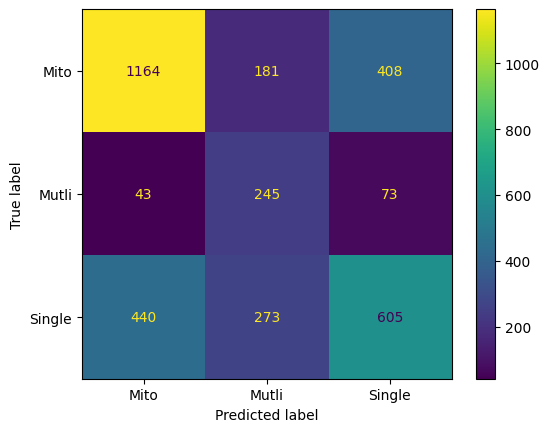

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Mito","Mutli","Single"])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = pd.DataFrame(pred, columns =[''])
print(classification_report(y1val,pred))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68      1753
           1       0.35      0.68      0.46       361
           2       0.56      0.46      0.50      1318

    accuracy                           0.59      3432
   macro avg       0.54      0.60      0.55      3432
weighted avg       0.61      0.59      0.59      3432



In [ ]:
test_l = []
test_ac = []

In [ ]:
def create_model():
    import tensorflow as tf
    import numpy as np
    from tensorflow import keras
    from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Dropout
    from tensorflow.keras.models import Model

    # n_features = 25
    # Define the input shape of the genome disorder data
    input_shape = (25,)

    # Define the number of classes for the genome disorder prediction
    num_classes = 9

    # Define the input layer
    input_layer = Input(shape=input_shape) #input layer

    # Define the fully connected layers
    fc1 = Dense(100,kernel_initializer='glorot_uniform')(input_layer)
    bn1 = BatchNormalization()(fc1)
    relu1 = Activation('relu')(bn1)
    dropout1 = Dropout(0.5)(relu1)

    fc2 = Dense(100,kernel_initializer='glorot_uniform')(dropout1)
    bn2 = BatchNormalization()(fc2)
    relu2 = Activation('relu')(bn2)
    dropout2 = Dropout(0.5)(relu2)

    fc3 = Dense(100,kernel_initializer='glorot_uniform')(dropout2)
    bn3 = BatchNormalization()(fc3)
    relu3 = Activation('relu')(bn3)
    dropout3 = Dropout(0.5)(relu3)

    fc4 = Dense(100,kernel_initializer='glorot_uniform')(dropout3)
    bn4 = BatchNormalization()(fc4)
    relu4 = Activation('relu')(bn4)
    dropout4 = Dropout(0.5)(relu4)

    fc5 = Dense(100,kernel_initializer='glorot_uniform')(dropout4)
    bn5 = BatchNormalization()(fc5)
    relu5 = Activation('relu')(bn5)
    dropout5 = Dropout(0.5)(relu5)

    fc6 = Dense(100,kernel_initializer='glorot_uniform')(dropout5)
    bn6 = BatchNormalization()(fc6)
    relu6 = Activation('relu')(bn6)
    dropout6 = Dropout(0.5)(relu6)

    # fc7 = Dense(3)(dropout6)
    # Define the output layer
    output_layer = Dense(9,kernel_initializer='glorot_uniform', activation='softmax')(dropout6)


    # Define the model
    model = Model(inputs=input_layer, outputs=output_layer)

    model.summary()
    from tensorflow.keras.optimizers import Adam

    # Compile the model with appropriate loss function, optimizer, and metrics
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'],steps_per_execution=25)

    # Train the model with appropriate training data and validation data
    # validation_data=(result_kbest_val,y1_en_val)
    # model.fit(result_kbest_20, y_t1, epochs=20, batch_size=10,validation_data=(result_kbest_val,y_val1))
    return model

In [ ]:
model = create_model()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 25)]              0         
                                                                 
 dense_7 (Dense)             (None, 100)               2600      
                                                                 
 batch_normalization_6 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 100)               0         
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                           

In [ ]:
model.fit(result_kbest_202, y_t2, epochs=20, batch_size=25,validation_data=(result_kbest_val2,y_val2))

Epoch 1/20
1277/1277 [==============================] - 12s 9ms/step - loss: 2.3025 - accuracy: 0.1497 - val_loss: 2.3607 - val_accuracy: 0.0084
Epoch 2/20
1277/1277 [==============================] - 4s 3ms/step - loss: 1.9841 - accuracy: 0.2473 - val_loss: 2.4302 - val_accuracy: 0.0128
Epoch 3/20
1277/1277 [==============================] - 6s 4ms/step - loss: 1.8736 - accuracy: 0.2774 - val_loss: 2.3198 - val_accuracy: 0.0874
Epoch 4/20
1277/1277 [==============================] - 4s 3ms/step - loss: 1.8147 - accuracy: 0.2935 - val_loss: 2.1923 - val_accuracy: 0.0367
Epoch 5/20
1277/1277 [==============================] - 5s 4ms/step - loss: 1.7722 - accuracy: 0.3013 - val_loss: 2.1251 - val_accuracy: 0.0644
Epoch 6/20
1277/1277 [==============================] - 5s 4ms/step - loss: 1.7589 - accuracy: 0.3033 - val_loss: 2.1178 - val_accuracy: 0.0580
Epoch 7/20
1277/1277 [==============================] - 4s 4ms/step - loss: 1.7298 - accuracy: 0.3082 - val_loss: 2.1063 - val_accuracy

In [ ]:
test_loss, test_acc = model.evaluate(result_kbest_val2,y_val2)
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)
test_l.append(test_loss)
test_ac.append(test_ac)

108/108 [==============================] - 0s 941us/step - loss: 2.0173 - accuracy: 0.1166
Test loss:  2.017293930053711
Test Accuracy:  0.11655011773109436


In [ ]:
model.fit(result_kbest_202, y_t2, epochs=50, batch_size=25,validation_data=(result_kbest_val2,y_val2))

Epoch 1/50
1277/1277 [==============================] - 5s 4ms/step - loss: 1.6436 - accuracy: 0.3344 - val_loss: 2.0274 - val_accuracy: 0.0862
Epoch 2/50
1277/1277 [==============================] - 4s 3ms/step - loss: 1.6387 - accuracy: 0.3397 - val_loss: 2.0101 - val_accuracy: 0.1087
Epoch 3/50
1277/1277 [==============================] - 6s 4ms/step - loss: 1.6388 - accuracy: 0.3380 - val_loss: 2.0298 - val_accuracy: 0.0825
Epoch 4/50
1277/1277 [==============================] - 4s 3ms/step - loss: 1.6359 - accuracy: 0.3404 - val_loss: 2.0076 - val_accuracy: 0.1664
Epoch 5/50
1277/1277 [==============================] - 4s 3ms/step - loss: 1.6343 - accuracy: 0.3401 - val_loss: 2.0056 - val_accuracy: 0.1591
Epoch 6/50
1277/1277 [==============================] - 5s 4ms/step - loss: 1.6321 - accuracy: 0.3410 - val_loss: 2.0172 - val_accuracy: 0.1317
Epoch 7/50
1277/1277 [==============================] - 4s 3ms/step - loss: 1.6309 - accuracy: 0.3425 - val_loss: 1.9882 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(result_kbest_val2,y_val2)
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)
test_l.append(test_loss)
test_ac.append(test_ac)

108/108 [==============================] - 0s 1ms/step - loss: 1.9883 - accuracy: 0.1594
Test loss:  1.9883193969726562
Test Accuracy:  0.15938228368759155


In [ ]:
model.fit(result_kbest_202, y_t2, epochs=80, batch_size=25,validation_data=(result_kbest_val2,y_val2))

Epoch 1/80
1277/1277 [==============================] - 4s 4ms/step - loss: 1.5737 - accuracy: 0.3702 - val_loss: 1.9864 - val_accuracy: 0.1457
Epoch 2/80
1277/1277 [==============================] - 5s 4ms/step - loss: 1.5781 - accuracy: 0.3729 - val_loss: 1.9804 - val_accuracy: 0.1643
Epoch 3/80
1277/1277 [==============================] - 6s 4ms/step - loss: 1.5711 - accuracy: 0.3708 - val_loss: 1.9761 - val_accuracy: 0.1428
Epoch 4/80
1277/1277 [==============================] - 5s 4ms/step - loss: 1.5776 - accuracy: 0.3718 - val_loss: 1.9807 - val_accuracy: 0.1410
Epoch 5/80
1277/1277 [==============================] - 5s 4ms/step - loss: 1.5762 - accuracy: 0.3680 - val_loss: 1.9868 - val_accuracy: 0.1224
Epoch 6/80
1277/1277 [==============================] - 4s 3ms/step - loss: 1.5818 - accuracy: 0.3713 - val_loss: 1.9722 - val_accuracy: 0.1705
Epoch 7/80
1277/1277 [==============================] - 5s 4ms/step - loss: 1.5753 - accuracy: 0.3688 - val_loss: 1.9852 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(result_kbest_val2,y_val2)
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)
test_l.append(test_loss)
test_ac.append(test_ac)

108/108 [==============================] - 0s 960us/step - loss: 1.9763 - accuracy: 0.1332
Test loss:  1.9763184785842896
Test Accuracy:  0.13315850496292114


In [ ]:
model.fit(result_kbest_202, y_t2, epochs=100, batch_size=25,validation_data=(result_kbest_val2,y_val2))

Epoch 1/100
1277/1277 [==============================] - 5s 4ms/step - loss: 1.5530 - accuracy: 0.3821 - val_loss: 1.9767 - val_accuracy: 0.1608
Epoch 2/100
1277/1277 [==============================] - 4s 4ms/step - loss: 1.5503 - accuracy: 0.3842 - val_loss: 1.9623 - val_accuracy: 0.1565
Epoch 3/100
1277/1277 [==============================] - 6s 4ms/step - loss: 1.5502 - accuracy: 0.3821 - val_loss: 1.9735 - val_accuracy: 0.1675
Epoch 4/100
1277/1277 [==============================] - 4s 3ms/step - loss: 1.5515 - accuracy: 0.3814 - val_loss: 1.9608 - val_accuracy: 0.1833
Epoch 5/100
1277/1277 [==============================] - 4s 4ms/step - loss: 1.5477 - accuracy: 0.3836 - val_loss: 1.9787 - val_accuracy: 0.1378
Epoch 6/100
1277/1277 [==============================] - 5s 4ms/step - loss: 1.5484 - accuracy: 0.3836 - val_loss: 1.9718 - val_accuracy: 0.1425
Epoch 7/100
1277/1277 [==============================] - 5s 4ms/step - loss: 1.5428 - accuracy: 0.3849 - val_loss: 1.9835 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(result_kbest_val2,y_val2)
print("Test loss: ", test_loss)
print("Test Accuracy: ",test_acc)
test_l.append(test_loss)
test_ac.append(test_ac)

108/108 [==============================] - 0s 949us/step - loss: 1.9906 - accuracy: 0.1518
Test loss:  1.990592360496521
Test Accuracy:  0.1518065333366394


In [ ]:
pred=model.predict(result_kbest_val)
pred

108/108 [==============================] - 0s 5ms/step


array([[0.00587557, 0.00146728, 0.16368803, ..., 0.14024144, 0.15590554,
        0.15516998],
       [0.00303478, 0.0005785 , 0.1001138 , ..., 0.08096812, 0.08848321,
        0.11061266],
       [0.00050655, 0.00067773, 0.07650582, ..., 0.06594393, 0.07012285,
        0.08824984],
       ...,
       [0.00310187, 0.00178148, 0.16451019, ..., 0.15399112, 0.16598853,
        0.15538725],
       [0.00447143, 0.0021346 , 0.1706614 , ..., 0.15067957, 0.16812772,
        0.15622912],
       [0.00360251, 0.00298069, 0.17106155, ..., 0.14359167, 0.16378252,
        0.15612346]], dtype=float32)

In [ ]:
import numpy
actual_pred = []
for ele in pred:
  actual_pred.append(numpy.argmax(ele))
pred = actual_pred

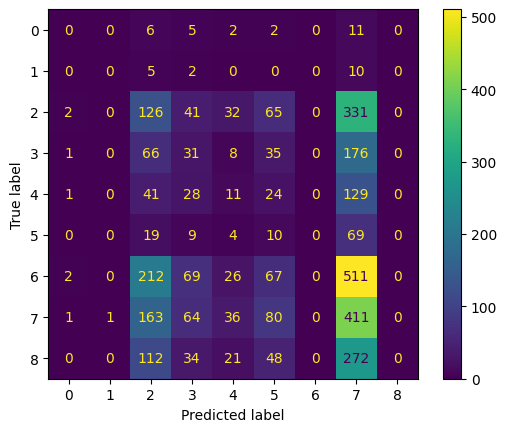

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y2val, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0',"1","2","3",'4','5','6','7','8'])
cm_display.plot()
plt.show()

In [ ]:
pred = pd.DataFrame(pred, columns =[''])
print(classification_report(y1val,pred))

              precision    recall  f1-score   support

           0       0.86      0.00      0.01      1753
           1       1.00      0.00      0.01       361
           2       0.40      0.23      0.29      1318
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.09      3432
   macro avg       0.32      0.03      0.04      3432
weighted avg       0.70      0.09      0.12      3432



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
